In [15]:
import pandas as pd
# load the source data for each panel 
panel_b = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)
panel_c = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0)
panel_d = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_d',index_col=0)
panel_e = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0)
panel_f = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0)
panel_g = pd.read_excel('./fig1_sourcedata.xlsx',engine='openpyxl',sheet_name='Panel_g',index_col=0)

In [22]:
panel_d

,wpm
0,17.142857


In [19]:
panel_g.head()

,WER,lang,Metric
0,33.333333,english,Real-time
1,22.222222,english,Real-time
2,0.000000,english,Real-time
3,6.666667,english,Real-time
4,0.000000,english,Real-time


/tmp/ipykernel_1196377/2775319652.py:74: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=panel_b,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only','Real-time'],order=['overall','spanish','english'],ax=ax,palette=a)
/tmp/ipykernel_1196377/2775319652.py:74: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(data=panel_b,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only','Real-time'],order=['overall','spanish','english'],ax=ax,palette=a)
/tmp/ipykernel_1196377/2775319652.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['All phrases','Spanish','English'])
/tmp/ipykernel_1196377/2775319652.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

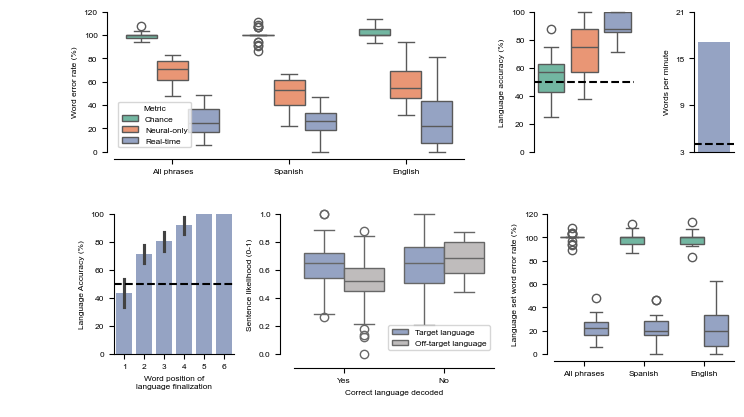

In [24]:
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from RT.util import fileHandler
from gimutil.visualization import plotting_tools
# set plotting parameters
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'font.sans-serif':'Arial'})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'


# Specifies plot parameters
rows = {
    'wer_start' : 0,
    'wer_stop'  : 225,
    'lang_start' : 0,
    'lang_stop' : 225,
    'force_start': 325,
    'force_stop' : 550,
    'total'      : 550,
}
cols = {
    'wer_start' : 0,
    'wer_stop'  : 350,#320
    'lang_start' : 420,#400
    'lang_stop' : 520,#500
    'wpm_start' : 580,
    'wpm_stop'  : 620,
    'beams_start': 180,#370,
    'beams_stop': 380,#470,
    'step_start': 0,#520,
    'step_stop' : 120,#620,
    'werforce_start': 440,
    'werforce_stop': 620,
    'total'      : 620
}
all_panel_params = {
    'wer' : {'row_and_col_spec' : ('wer', 'wer')},
    'lang'  : {'row_and_col_spec' : ('lang', 'lang')},
    'force_wer'           : {'row_and_col_spec' : ('force', 'werforce')},
    'wpm'           : {'row_and_col_spec' : ('wer', 'wpm')},
    'beams'           : {'row_and_col_spec' : ('force', 'beams')},
    'step'           : {'row_and_col_spec' : ('force', 'step')}
}


# AAC calculation
import numpy as np
aac_speed = 3.97


a = sns.color_palette("Set2")
hex_col = a.as_hex()
a = np.array(a)


w_to_h = 1.8
width = 8
# Creates the plot
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,dpi=100,
    figsize=(width,width/w_to_h)
)


# plot wers 
ax = axs['wer']
sns.boxplot(data=panel_b,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only','Real-time'],order=['overall','spanish','english'],ax=ax,palette=a)
ax.set_xlabel('')
ax.set_ylabel('Word error rate (%)')
ax.set_ylim([0,120])
ax.set_xticklabels(['All phrases','Spanish','English'])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the language accuracy
ax = axs['lang']
sns.boxplot(data=panel_c,x='paradigm',y='Acc',ax=ax,whis=1,order=['Chance','Neural-only','Real-time'],palette=a)
ax.axhline(50,color='k',linestyle='--')
ax.set_ylabel('Language accuracy (%)')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylim([0,100])
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)

# plot the force WER accuracy
ax = axs['force_wer']
sns.boxplot(data=panel_g,x='lang',y='WER',hue='Metric',hue_order=['Chance','Real-time'],ax=ax,order=['overall','spanish','english'],palette=a[[0,2]])
ax.set_xlabel('')
ax.set_ylabel('Language set word error rate (%)')
ax.legend([],[], frameon=False)
ax.set_ylim([0,120])
ax.set_xticklabels(['All phrases','Spanish','English'])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the wpm
ax = axs['wpm']
sns.barplot(data=panel_d, y='wpm',ax=ax,palette=a[2:])
ax.set_xlabel('')
ax.set_ylabel('Words per minute')
ax.set_xticks([])
ax.set_ylim([3,21])
ax.set_yticks([3,9,15,21])
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)
ax.axhline(aac_speed,linestyle='--',color='k')


# plot the beams 
ax = axs['beams']
seaborn_legend  = sns.boxplot(data=panel_f,x='correct_decode',y='score',hue='target-lang',ax=ax,order=[True,False],
                              palette=[hex_col[2],'#bfbbbb'])#hex_col[2][0] + '0D' + hex_col[2][1:]])
ax.set_xlabel('Correct language decoded')
ax.set_xticklabels(['Yes','No'])
ax.set_ylabel('Sentence likelihood (0-1)')
ax.legend().set_title('')
ax.set_ylim([0,1])
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.set_clip_on(False)
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the accuracy as func of step 
ax = axs['step']
sns.barplot(data=panel_e,x='Word',y='Accuracy',color=hex_col[2],ci=99)
ax.set_xticklabels(range(1,7))
ax.set_xlabel('Word position of\nlanguage finalization')
ax.set_ylabel('Language Accuracy (%)')
ax.axhline(50,linestyle='--',color='k')
ax.set_ylim([0,100])



plt.savefig('fig_1_nbme.svg',bbox_inches='tight')
plt.show()

In [18]:
from scipy.stats import mannwhitneyu
#Off-target language
mannwhitneyu(d['score'][(d['correct_decode']) & (d['target-lang'] == 'Target language')],
             d['score'][np.logical_not(d['correct_decode']) & (d['target-lang'] == 'Target language')])

#seaborn_legend  = sns.boxplot(data=d,x='correct_decode',y='score',hue='target-lang',ax=ax,order=[True,False],


MannwhitneyuResult(statistic=759.5, pvalue=0.9083694008843546)

In [20]:
# plot wers 
from statsmodels.stats.multitest import multipletests
chance = fileHandler.loadPickle('./chance_dists_t_shuff.pkl')

ax = axs['wer']
chance_ = {}
chance_['english'] = chance['eng_wer']
chance_['spanish'] = chance['spa_wer']
chance_['overall'] = chance['wer']
all_vals = []
all_langs = []
for key in chance_.keys():
    arr = chance_[key]
    for val in arr:
        all_vals.append(val)
        all_langs.append(key)
df_chance = {}
df_chance['WER'] = all_vals
df_chance['lang'] = all_langs
df_chance['Metric'] = 'Chance'
df_chance = pd.DataFrame(df_chance)

df = fileHandler.loadPickle('./overall_wers.pkl')
df['Metric'] = 'Real-time'
df_neural = fileHandler.loadPickle('./neural_only.pkl')
df_neural['Metric'] = 'Neural-only'
overall_df = pd.concat((df,df_neural,df_chance))
straps = np.array(bootstrap(df['WER'][df['lang']=='overall'] ))
print(np.median(df['WER'][df['lang']=='overall'] ))
print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')

straps = np.array(bootstrap(df['WER'][df['lang']=='spanish'] ))
print(np.median(df['WER'][df['lang']=='spanish'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')

straps = np.array(bootstrap(df['WER'][df['lang']=='english'] ))
print(np.median(df['WER'][df['lang']=='english'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('NEURAL ONLY')

df = df_neural.copy()
straps = np.array(bootstrap(df['WER'][df['lang']=='overall'] ))
print(np.median(df['WER'][df['lang']=='overall'] ))
print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')

straps = np.array(bootstrap(df['WER'][df['lang']=='spanish'] ))
print(np.median(df['WER'][df['lang']=='spanish'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')

straps = np.array(bootstrap(df['WER'][df['lang']=='english'] ))
print(np.median(df['WER'][df['lang']=='english'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')


from scipy.stats import wilcoxon,ranksums,mannwhitneyu
d = {'Language': [], 'Paradigm 1': [], 'Paradigm 2': [], 'Test-statistic': [], 'P-value': []} 
compares = [('Chance','Neural-only'),('Chance','Real-time'),('Neural-only','Real-time')]
langs = ['overall','spanish','english']
all_ps = []
for lang in langs:
    print()
    print(lang)
    for compare in compares:
        d['Language'].append(lang.capitalize())
        d['Paradigm 1'].append(compare[0])
        d['Paradigm 2'].append(compare[1])
    
        result = mannwhitneyu(overall_df['WER'][(overall_df['lang'] == lang) & (overall_df['Metric'] == compare[0])],
                 overall_df['WER'][(overall_df['lang'] == lang) & (overall_df['Metric'] == compare[1])])
        d['Test-statistic'].append(result[0])
        d['P-value'].append(result[1])

d = pd.DataFrame(d)
d['P-value'] = multipletests(d['P-value'].values,alpha=0.01,method='holm')[1]

0.25
0.16666666666666666
0.36363636363636365

0.26666666666666666
0.18181818181818182
0.3333333333333333

0.2222222222222222
0.07142857142857142
0.4444444444444444
NEURAL ONLY
0.70625
0.61875
0.78125

0.5249999999999999
0.4041666666666667
0.6166666666666667

0.55
0.4625
0.6875


overall

spanish

english


In [21]:
len(overall_df['WER'][(overall_df['lang'] == lang) & (overall_df['Metric'] == compare[0])])

21

In [22]:
print(d.to_latex(index=False,float_format="{:0.2e}".format))  

\begin{tabular}{lllrr}
\toprule
Language &  Paradigm 1 &  Paradigm 2 &  Test-statistic &  P-value \\
\midrule
 Overall &      Chance & Neural-only &        4.41e+02 & 1.91e-07 \\
 Overall &      Chance &   Real-time &        4.41e+02 & 1.91e-07 \\
 Overall & Neural-only &   Real-time &        4.40e+02 & 1.91e-07 \\
 Spanish &      Chance & Neural-only &        4.41e+02 & 1.91e-07 \\
 Spanish &      Chance &   Real-time &        4.41e+02 & 1.91e-07 \\
 Spanish & Neural-only &   Real-time &        4.13e+02 & 2.66e-06 \\
 English &      Chance & Neural-only &        4.40e+02 & 1.91e-07 \\
 English &      Chance &   Real-time &        4.41e+02 & 1.91e-07 \\
 English & Neural-only &   Real-time &        3.74e+02 & 1.24e-04 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_111493/3706759632.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d.to_latex(index=False,float_format="{:0.2e}".format))


In [23]:
df = fileHandler.loadPickle('./language_acc_new.pkl')
import pandas as pd
df_lang_chance = pd.DataFrame()
df_lang_chance['Acc'] = chance['lang_acc']
df_lang_chance['paradigm'] = 'Chance'
df = pd.concat((df,df_lang_chance))
df['Acc'] *= 100
overall_df = df.copy()
straps = np.array(bootstrap(df['Acc'][df['paradigm']=='Real-time'] ))
print(np.median(df['Acc'][df['paradigm']=='Real-time'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')


from scipy.stats import wilcoxon,ranksums
d = {'Evaluation 1': [], 'Evaluation 2': [], 'Test-statistic': [], 'P-value': []} 
compares = [('Chance','Neural-only'),('Chance','Real-time'),('Neural-only','Real-time')]

for compare in compares:
    d['Evaluation 1'].append(compare[0])
    d['Evaluation 2'].append(compare[1])

    result = mannwhitneyu(overall_df['Acc'][(overall_df['paradigm'] == compare[0])],
             overall_df['Acc'][(overall_df['paradigm'] == compare[1])])
    d['Test-statistic'].append(result[0])
    d['P-value'].append(result[1])

d = pd.DataFrame(d)
d['P-value'] = multipletests(d['P-value'].values,alpha=0.01,method='holm')[1]


87.5
85.71428571428571
100.0



In [24]:
print(d.to_latex(index=False,float_format="{:0.2e}".format))  

\begin{tabular}{llrr}
\toprule
Evaluation 1 & Evaluation 2 &  Test-statistic &  P-value \\
\midrule
      Chance &  Neural-only &        1.05e+02 & 4.79e-03 \\
      Chance &    Real-time &        1.50e+01 & 5.44e-07 \\
 Neural-only &    Real-time &        1.02e+02 & 4.79e-03 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_111493/3706759632.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d.to_latex(index=False,float_format="{:0.2e}".format))


In [25]:
df = fileHandler.loadPickle('./force_wers.pkl')
df['Metric'] = 'Real-time'
df['WER'] = df['WER'].values*100
chance_ = {}
chance_['english'] = chance['eng_wer_set']
chance_['spanish'] = chance['spa_wer_set']
chance_['overall'] = chance['wer_set']
all_vals = []
all_langs = []
for key in chance_.keys():
    arr = chance_[key]
    for val in arr:
        all_vals.append(val)
        all_langs.append(key)
df_chance = {}
df_chance['WER'] = all_vals
df_chance['lang'] = all_langs
df_chance['Metric'] = 'Chance'
df_chance = pd.DataFrame(df_chance)
df_chance['WER'] = df_chance['WER']*100



straps = np.array(bootstrap(df['WER'][df['lang']=='overall'] ))
print(np.median(df['WER'][df['lang']=='overall'] ))
print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')
straps = np.array(bootstrap(df['WER'][df['lang']=='spanish'] ))
print(np.median(df['WER'][df['lang']=='spanish'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
print('')

straps = np.array(bootstrap(df['WER'][df['lang']=='english'] ))
print(np.median(df['WER'][df['lang']=='english'] ))

print(np.percentile(straps,0.5))
print(np.percentile(straps,99.5)) 
df = pd.concat((df,df_chance))

overall_df = df.copy()

from scipy.stats import wilcoxon,ranksums
d = {'Language': [], 'Paradigm 1': [], 'Paradigm 2': [], 'Test-statistic': [], 'P-value': []} 
compares = [('Chance','Real-time')]
langs = ['overall','spanish','english']
all_ps = []
for lang in langs:
    print()
    print(lang)
    for compare in compares:
        d['Language'].append(lang)
        d['Paradigm 1'].append(compare[0])
        d['Paradigm 2'].append(compare[1])
    
        result = mannwhitneyu(overall_df['WER'][(overall_df['lang'] == lang) & (overall_df['Metric'] == compare[0])],
                 overall_df['WER'][(overall_df['lang'] == lang) & (overall_df['Metric'] == compare[1])])
        d['Test-statistic'].append(result[0])
        d['P-value'].append(result[1])

d = pd.DataFrame(d)
d['P-value'] = multipletests(d['P-value'].values,alpha=0.01,method='holm')[1]

21.875
16.666666666666664
27.586206896551722

20.0
16.666666666666664
28.57142857142857

20.0
6.666666666666667
33.33333333333333

overall

spanish

english


In [26]:
print(d.to_latex(index=False,float_format="{:0.2e}".format))  

\begin{tabular}{lllrr}
\toprule
Language & Paradigm 1 & Paradigm 2 &  Test-statistic &  P-value \\
\midrule
 overall &     Chance &  Real-time &        4.41e+02 & 6.41e-08 \\
 spanish &     Chance &  Real-time &        4.41e+02 & 6.41e-08 \\
 english &     Chance &  Real-time &        4.41e+02 & 6.41e-08 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_111493/3706759632.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(d.to_latex(index=False,float_format="{:0.2e}".format))


/tmp/ipykernel_111493/4175068128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['target-lang'][d['target-lang'] == 'Target'] = 'Target language'
/tmp/ipykernel_111493/4175068128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['target-lang'][d['target-lang'] == 'Off-target'] = 'Off-target language'


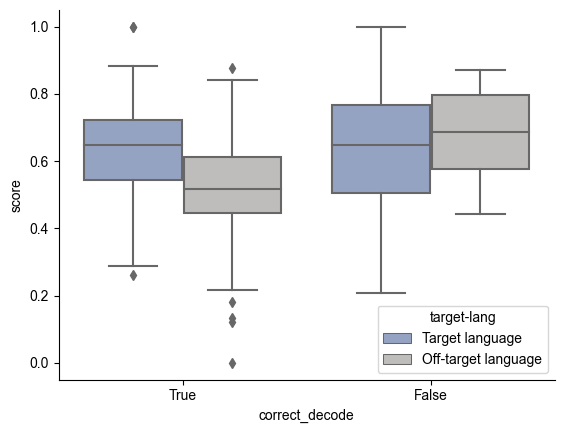

In [31]:
with open('./beam_scores_corr_incorr_decode.pkl','rb') as f:
    d = pickle.load(f)
fig,ax = plt.subplots()
#palette=hex_col[2]
d['score'] = scaler.fit_transform(d.score.values.reshape(-1,1))
d['target-lang'][d['target-lang'] == 'Target'] = 'Target language'
d['target-lang'][d['target-lang'] == 'Off-target'] = 'Off-target language'

seaborn_legend  = sns.boxplot(data=d,x='correct_decode',y='score',hue='target-lang',ax=ax,order=[True,False],
                              palette=[hex_col[2],'#bfbbbb'])#hex_col[2][0] + '0D' + hex_col[2][1:]])

In [28]:
from scipy.stats import ranksums
mannwhitneyu(d[np.logical_not(d['correct_decode'])][d['target-lang'] == 'Target language'].score.values,
             d[np.logical_not(d['correct_decode'])][d['target-lang'] == 'Off-target language'].score.values)

/tmp/ipykernel_111493/4042299361.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mannwhitneyu(d[np.logical_not(d['correct_decode'])][d['target-lang'] == 'Target language'].score.values,
/tmp/ipykernel_111493/4042299361.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d[np.logical_not(d['correct_decode'])][d['target-lang'] == 'Off-target language'].score.values)


MannwhitneyuResult(statistic=60.0, pvalue=0.5066281058229414)

In [32]:
mannwhitneyu(d[d['correct_decode']][d['target-lang'] == 'Target language'].score.values,
             d[d['correct_decode']][d['target-lang'] == 'Off-target language'].score.values)

/tmp/ipykernel_111493/3801703651.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mannwhitneyu(d[d['correct_decode']][d['target-lang'] == 'Target language'].score.values,
/tmp/ipykernel_111493/3801703651.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d[d['correct_decode']][d['target-lang'] == 'Off-target language'].score.values)


MannwhitneyuResult(statistic=11177.5, pvalue=6.533119893582141e-10)